In [1]:
%run load_mnist.py

#### Train

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88132374, 0.91529576, 0.91018653])

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90961808, 0.91574579, 0.91473721])

#### Predict

In [4]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

#### Evaluate

In [5]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5732,    2,   15,   10,    7,   73,   33,    2,   34,   15],
       [   1, 6260,   28,   41,    5,   13,    2,   24,  348,   20],
       [  62,   69, 5124,  226,   77,   25,   87,   70,  196,   22],
       [  26,   24,   67, 5407,    2,  287,   17,   35,  182,   84],
       [  18,    9,   30,    3, 5004,   12,   59,   22,  100,  585],
       [  65,    8,   30,  239,   32, 4642,  113,    8,  210,   74],
       [  46,    8,   67,    1,   30,   91, 5625,    3,   46,    1],
       [  16,   17,   42,   61,   32,    5,    2, 5656,   42,  392],
       [  29,   75,   54,  156,    9,  215,   46,   12, 5169,   86],
       [  21,   13,   11,   57,   56,   29,    3,  139,  103, 5517]])

In [6]:
from matplotlib import pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<Figure size 480x480 with 1 Axes>

In [7]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums.shape

(10, 1)

#### Error
* Remember that rows represent actual classes, while columns represent predicted classes.
* The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as 8s or 9s. 
* Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused with other digits. 
* Conversely, some rows are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with 8s, but that’s about it). 
* Notice that the errors are not perfectly symmetrical; for example, there are more 5s misclassified as 8s than the reverse.

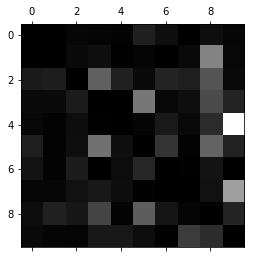

In [8]:
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Ensemble Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [10]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88132374, 0.91529576, 0.91018653])